In [1]:
!uv add numpy matplotlib sympy

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot
from IPython.display import display, Math, Latex

# funzioni locali
import main

Resolved 46 packages in 5ms
Audited 13 packages in 0.05ms


In [2]:
def to_latex(a):
    latex = "\\begin{align}\n"
    for (n, d) in enumerate(a): 
        if isinstance(d, dict):
            for i, (key, eq) in enumerate(d.items(), 1):
                latex += f"{sp.latex(eq)} \\quad &\\text{{({n, i})}} \\\\\n"
        else:
            latex += f"{sp.latex(d)} \\quad &\\text{{({n})}} \\\\\n"
    latex = latex.rstrip(" \\\\\n") + "\n\\end{align}"
    return Math(latex)

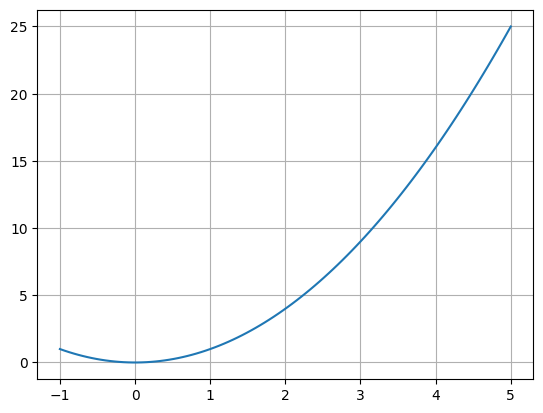

In [3]:


# Definire una funzione simbolica
x = sp.Symbol('x')
f = x**2

# Calcolare derivata
f_prime = sp.diff(f, x)

# Creare grafico
x_vals = np.linspace(-1, 5, 100)
y_vals = [float(f.subs(x, val)) for val in x_vals]

plt.plot(x_vals, y_vals)
plt.grid(True)
plt.show()

In [4]:
f

x**2

## Sistema

Proviamo a  risolvere un sistema di equazioni

In [5]:
x, a = sp.symbols("x a")
fn1 = x + a
fn2 = x**2 / 2 + 3

to_latex([fn1, fn2])


<IPython.core.display.Math object>

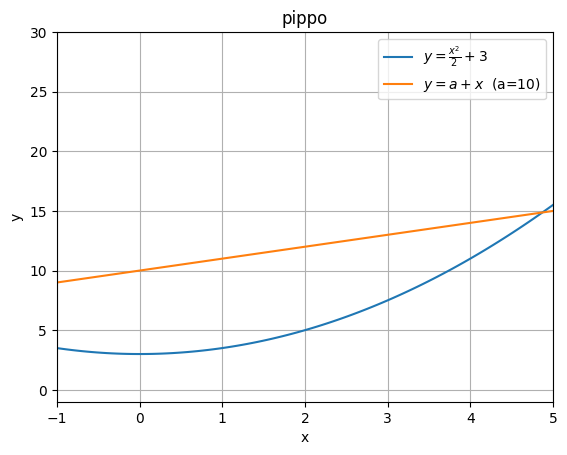

In [6]:
x_vals = np.linspace(-1, 5, 100)
y_vals_2 = [float(fn2.subs(x, val)) for val in x_vals]
y_vals_1 = [float(fn1.subs({x: val, a: 10})) for val in x_vals] 

plt.plot(x_vals, y_vals_2, label=f'$y = {sp.latex(fn2)}$')
plt.plot(x_vals, y_vals_1, label=f'$y = {sp.latex(fn1)}$  (a=10)')
plt.legend(loc='best')

plt.xlim(-1, 5)
plt.ylim(-1, 30)
plt.xlabel('x')
plt.ylabel('y')
plt.title("pippo")
plt.grid(True)
plt.show()

In [7]:
ss = sp.solve(fn1-fn2)
to_latex(ss)

<IPython.core.display.Math object>

In [8]:
# prendo la mia funzione in a
s = ss[0][a]

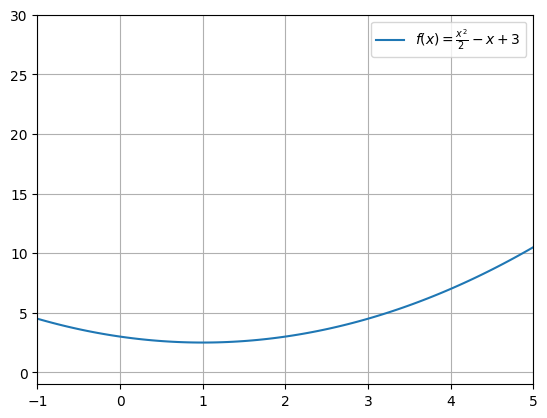

In [9]:
x_vals = np.linspace(-1, 5, 100)
y_vals_1 = [float(s.subs({x: val})) for val in x_vals]

plt.plot(x_vals, y_vals_1, label=f'$f(x) = {sp.latex(s)}$')
plt.legend()

plt.xlim(-1, 5)
plt.ylim(-1, 30)
plt.grid(True)
plt.show()

## Sistema esplicito

In [10]:
x, y= sp.symbols('x y')
equations = [
    sp.Eq(y, x**2),     # y = x^2
    sp.Eq(y, x + 1)     # y = x + 1
]


Questpo è il sistema di equazioni:

In [11]:
to_latex(equations)

<IPython.core.display.Math object>

Che posso risolvere con solve():

In [12]:
sol= sp.solve(equations)
to_latex(sol)

<IPython.core.display.Math object>

## Compito di Leo

- metto l'ellisse in forma y=...
- cerco le intersezioni
- risolvo in modo che le due soluzioni coincidano (determinante=0)


In [13]:
x, y, a= sp.symbols('x y a')

ell = sp.Eq(((x**2) / 64) + (y**2)/25, 1)
rig = sp.Eq(y, x + a)



In [14]:
to_latex([ell, rig])

<IPython.core.display.Math object>

In [15]:
ell_y = sp.solve(ell, y)
to_latex(ell_y)

<IPython.core.display.Math object>

In [16]:
ell_y_p = ell_y[1]
ell_y_n = ell_y[0]


In [17]:
in_a = sp.solve(sp.Eq( ell_y_p, rig.rhs ), a)[0]
in_a

-x + 5*sqrt(64 - x**2)/8

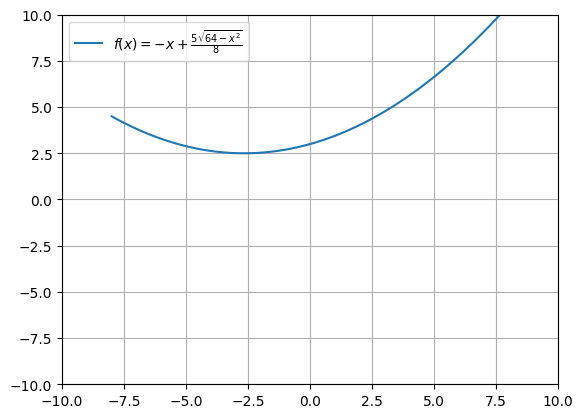

In [18]:
x_vals = np.linspace(-8, 8, 100)
x_vals_1 = [float(in_a.subs({x: val})) for val in x_vals]

plt.plot(x_vals, y_vals_1, label=f'$f(x) = {sp.latex(in_a)}$')

plt.legend()

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()


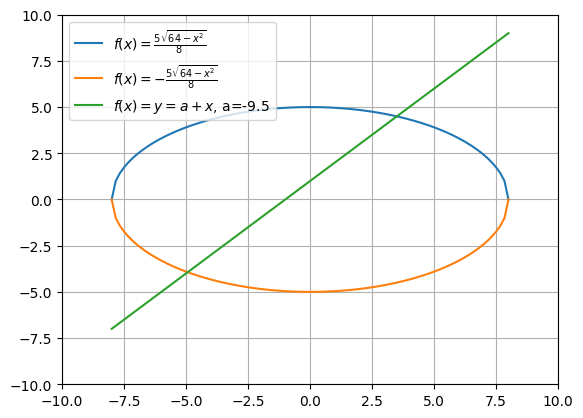

In [19]:
av = -9.5
x_vals = np.linspace(-8, 8, 100)
y_vals_1p = [float(ell_y_p.subs({x: val})) for val in x_vals]
y_vals_1n = [float(ell_y_n.subs({x: val})) for val in x_vals]
y_vals_2 = [float(equations[1].rhs.subs({x: val, a: av})) for val in x_vals]


plt.plot(x_vals, y_vals_1p, label=f'$f(x) = {sp.latex(ell_y_p)}$')
plt.plot(x_vals, y_vals_1n, label=f'$f(x) = {sp.latex(ell_y_n)}$')

plt.plot(x_vals, y_vals_2, label=f'$f(x) = {sp.latex(rig)}$, a=' + str(av))

plt.legend()

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()

In [20]:
f_sup = ell_y_p - rig.rhs
f_sup_a = sp.solve(f_sup, a)
f_sup_a = f_sup_a[0]
f_sup_a

-x + 5*sqrt(64 - x**2)/8

In [21]:
x_vals = np.linspace(-8, 8, 100)
y_vals_1 = [float(e12p.subs({x: val})) for val in x_vals]
y_vals_2 = [float(equations[1].rhs.subs({x: val, a: -5})) for val in x_vals]


plt.plot(x_vals, y_vals_1, label=f'$f(x) = {sp.latex(e12p)}$')
plt.plot(x_vals, y_vals_2, label=f'$f(x) = {sp.latex(e12p)}$')

plt.legend()

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()

NameError: name 'e12p' is not defined

In [22]:
main.pluto()

197

## Riformulazione diretta

Mi serve il punto in cui entrambe le intersezioni coincidono.

Comincio quindi sosituendo la riga nella parabola.

In [23]:
x, y, a= sp.symbols('x y a')

ell = sp.Eq(((x**2) / 64) + (y**2)/25, 1)
rig = sp.Eq(y, x + a)

to_latex([ell, rig])

<IPython.core.display.Math object>

Sotituisce riga nella parabola, mettendola al posto della y, in maniera da avere ua sola equazione

In [24]:
sx = ell.subs({y: rig.rhs})
sx

Eq(x**2/64 + (a + x)**2/25, 1)

La risolvo per x e trovo le due radici.


In [25]:
as_x = sp.solve(sx, x)
to_latex(as_x)

<IPython.core.display.Math object>

Visto che il punto di tangenza è unico, le due radici devono coincidere. 


In [26]:
in_a = sp.Eq( as_x[0], as_x[1])
in_a

Eq(-64*a/89 - 40*sqrt(89 - a**2)/89, -64*a/89 + 40*sqrt(89 - a**2)/89)

Risolvo la coincidenza delell radici in a

In [27]:
soluzioni = sp.solve(in_a, a)
to_latex(soluzioni)

<IPython.core.display.Math object>

Faccio un grafico per vedere visivamente che le soluzioni hanno senso.

Creo due funzioni con le due soluzioni di 'a'.

In [28]:
rr1 = rig.subs({a: soluzioni[0]})
rr2 = rig.subs({a: soluzioni[1]})

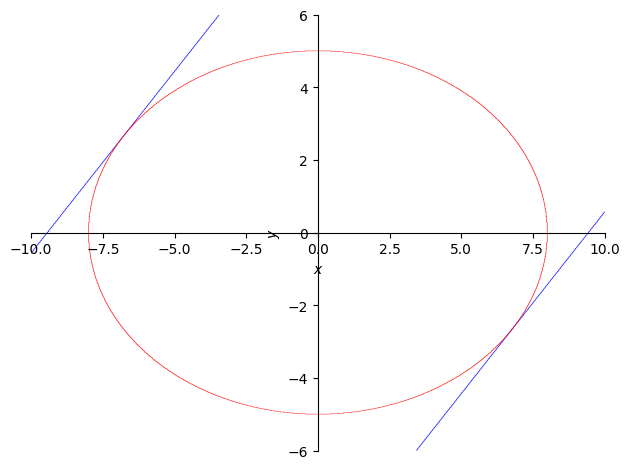

In [29]:


p1 = sp.plot_implicit(rr1,  (x, -10, 10), (y, -6, 6), show=False)
p2 = sp.plot_implicit(rr2,  (x, -10, 10), (y, -6, 6), show=False)
p3 = sp.plot_implicit(ell,  (x, -10, 10), (y, -6, 6), show=False, line_color="red")
p1.extend(p2)
p1.extend(p3)
p1.show()

